In [36]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [37]:
from pipeline import Pipeline

In [38]:
import logging

# Disable logging
logging.disable(logging.INFO)

In [39]:
p = Pipeline()
p.run()

              precision    recall  f1-score   support

        away       0.48      0.49      0.49      1038
        home       0.49      0.47      0.48      1052

    accuracy                           0.48      2090
   macro avg       0.48      0.48      0.48      2090
weighted avg       0.48      0.48      0.48      2090



In [40]:
import pandas as pd

In [41]:
df_combined = pd.read_csv('datacombiner/data/combined.csv')

In [42]:
df_combined[df_combined['id'] == 388579]

df_games = pd.read_csv('datacombiner/data/combined.csv')


In [43]:
df_games

df_games[df_games['round_description'] == 'Q1']


,finished,result,homeTeamScore,awayTeamScore,hasNextRoundLink,id,events,seriesStartDate,home_id,away_id,round_description,tournamentName,uniqueTournament,id_home,name_home,birthdate_home,id_away,name_away,birthdate_away
1813,True,1:2,1,2,True,1566464,[10058574],2022-01-10 00:30:00,24415,16042,Q1,"Australian Open, Melbourne, Australia, Qualifying",Australian Open,24415,Andrej Martin,1994-02-11,16042,Robin Haase,2004-10-03
1814,True,0:2,0,2,True,1566465,[10058573],2022-01-10 00:30:00,18066,16683,Q1,"Australian Open, Melbourne, Australia, Qualifying",Australian Open,18066,Mirza Basic,1974-11-14,16683,Mikhail Kukushkin,1996-08-11
1815,True,0:2,0,2,True,1566466,[10061698],2022-01-10 23:00:00,17004,95801,Q1,"Australian Open, Melbourne, Australia, Qualifying",Australian Open,17004,Ruben Bemelmans,1984-03-18,95801,Andrea Vavassori,2000-04-17
1816,True,2:0,2,0,True,1566467,[10058571],2022-01-10 23:00:00,80491,72230,Q1,"Australian Open, Melbourne, Australia, Qualifying",Australian Open,80491,Ernesto Escobedo,1975-04-15,72230,Altug Celikbilek,1979-11-27
1817,True,2:1,2,1,True,1566468,[10058570],2022-01-11 08:35:00,50139,24474,Q1,"Australian Open, Melbourne, Australia, Qualifying",Australian Open,50139,Norbert Gombos,1991-08-07,24474,Andrey Kuznetsov,1983-06-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10417,True,2:0,2,0,True,2764955,[13914511],2025-05-19 12:45:00,146040,421695,Q1,"French Open, Paris, France, Qualifying",Roland Garros,146040,Federico Agustin Gomez,1994-02-03,421695,Mae Malige,1975-01-19
10418,True,0:2,0,2,True,2764958,[13914492],2025-05-19 09:25:00,307391,232036,Q1,"French Open, Paris, France, Qualifying",Roland Garros,307391,Daniel Rincon,1986-01-29,232036,Tristan Boyer,1971-11-27
10419,True,1:2,1,2,True,2764959,[13914584],2025-05-19 10:05:00,207081,322022,Q1,"French Open, Paris, France, Qualifying",Roland Garros,207081,Duje Ajduković,2002-10-24,322022,Vilius Gaubas,1983-11-16
10420,True,1:2,1,2,True,2764961,[13914505],2025-05-19 09:55:00,58369,264358,Q1,"French Open, Paris, France, Qualifying",Roland Garros,58369,Alex Bolt,2004-01-23,264358,Pablo Llamas Ruiz,1988-03-28


In [44]:
df_features = pd.read_csv('features/data/features.csv').drop(columns=['id_home', 'id_away'])

In [45]:
# Map result to 0/1 values
df_features['result'] = df_features['result'].apply(lambda x: 0 if x.startswith('home') else 1)

In [46]:
corr_matrix = df_features.corr()
print(corr_matrix['result'].sort_values(ascending=False))

result           1.000000e+00
age_away         1.942472e-02
month_2          1.683478e-16
month_9          7.618507e-17
month_10         4.389728e-17
surface_Clay     2.406475e-17
month_6          1.245002e-17
month_5         -1.138409e-17
month_cos       -2.145006e-17
surface_Hard    -2.291931e-17
month_sin       -4.467899e-17
month_1         -7.590022e-17
round_ordinal   -1.638299e-16
age_home        -1.942472e-02
Name: result, dtype: float64


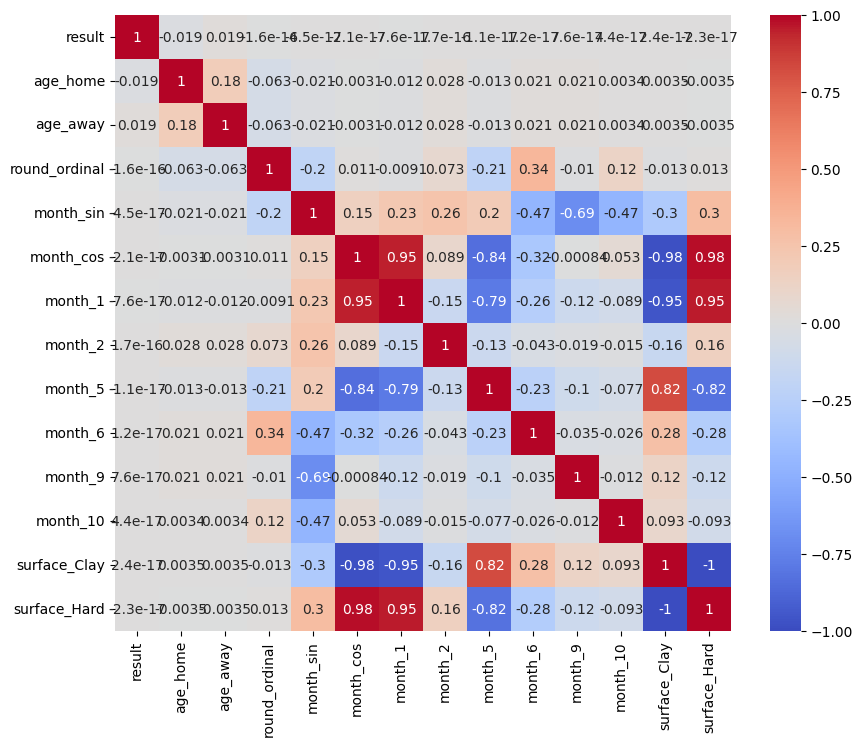

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df_features.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.show()


### Model training

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GroupShuffleSplit

In [49]:
df_train['result']

NameError: name 'df_train' is not defined

In [ ]:
# Prepare features and label
X = df_train[['birthdate_home', 'birthdate_away']].astype(int)
y = df_train['result'].apply(
    lambda x: int(
        isinstance(x, str) and ':' in x and int(x.split(':')[0]) > int(x.split(':')[1])
    )
)


In [ ]:
y

0       1
1       1
2       1
3       0
4       1
       ..
5433    1
5434    0
5435    0
5436    0
5437    0
Name: result, Length: 5438, dtype: int64

In [ ]:

# Split data
# Group by 'id' to ensure matches (and their symmetrized counterparts) stay together
groups = df_train_sym['id']

gss = GroupShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
train_idx, test_idx = next(gss.split(X, y, groups=groups))

X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

# Train model
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

In [ ]:
duplicates = df['participants']['name'].duplicated(keep=False)
if duplicates.any():
    print("Duplicate names found:")
    print(df['participants'][duplicates]['name'].value_counts())
else:
    print("No duplicate names found.")

No duplicate names found.


In [ ]:
# Symmetrize matches: add a row for each match with home/away swapped and result reversed
def reverse_result(result):
    # Handles results like '3:1', '2:3', etc.
    if isinstance(result, str) and ':' in result:
        parts = result.split(':')
        return f"{parts[1]}:{parts[0]}"
    return result

df_train_sym = df_train.copy()
swapped = df_games.copy()

# Swap home and away columns
# Automatically swap all columns containing 'home' and 'away' in their names
for col in df_games.columns:
    if 'home' in col or 'away' in col:
        away_col = col.replace('home', 'away')
        if away_col in df_games.columns:
            swapped[col], swapped[away_col] = df_games[away_col], df_games[col]
swapped['result'] = df_games['result'].apply(reverse_result)

# Optionally, you may want to swap other columns if needed (e.g., events, round_description)
# For now, keep other columns as is

# Concatenate original and swapped
df_games_sym = pd.concat([df_games, swapped], ignore_index=True)
df_games_sym.reset_index(drop=True, inplace=True)

print(f"Original matches: {len(df_games)}, Symmetrized matches: {len(df_games_sym)}")
display(df_games_sym.head())

Original matches: 2719, Symmetrized matches: 5438


,finished,result,homeTeamScore,awayTeamScore,hasNextRoundLink,id,events,seriesStartDate,month,home_id,away_id,round_description
0,True,3:0,3,0,True,388579,[6654894],2015-01-20 03:35:00,1,702241,702240,R128
1,True,3:1,3,1,True,388589,[6653593],2015-01-20 06:15:00,1,702260,702261,R128
2,True,3:2,3,2,True,388635,[6654901],2015-01-20 04:30:00,1,702353,702352,R128
3,True,1:3,1,3,True,388609,[6653598],2015-01-20 01:35:00,1,702301,702300,R128
4,True,3:0,3,0,True,388641,[6654893],2015-01-20 01:55:00,1,702365,702364,R128


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

df_games_clean = df_games.dropna(subset=['homeTeamScore', 'awayTeamScore', 'result'])
X = df_games_clean[['home_id', 'away_id']].astype(int)
y = df_games_clean['result'].apply(lambda x: 1 if x.startswith('3:') else 0)  # 1: home wins, 0: otherwise

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))